# Part 2 Supervised

In [1]:
import pandas as pd
import numpy as np

In [2]:
targets = pd.read_csv('train_set.csv', sep=';')
codes = pd.read_csv('codes.csv', sep=';')
types = pd.read_csv('types.csv', sep=';')
transactions = pd.read_csv('transactions.csv', sep=';')

## I. Explore the dataset. Do the descriptive statistics. 

###### First of all it is important to see the general statistics of the transactions dataset

In [3]:
transactions.head()

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87


In [4]:
transactions.describe()

,client_id,code,type,sum
count,1.300390e+05,130039.000000,130039.000000,1.300390e+05
mean,5.086859e+07,5594.629996,2489.372135,-1.812909e+04
std,2.872854e+07,606.087084,2253.296578,5.584445e+05
min,2.289900e+04,742.000000,1000.000000,-4.150030e+07
25%,2.577174e+07,5211.000000,1030.000000,-2.244916e+04
50%,5.235837e+07,5641.000000,1110.000000,-5.502490e+03
75%,7.506302e+07,6010.000000,2370.000000,-1.122960e+03
max,9.999968e+07,9402.000000,8145.000000,6.737747e+07


It tells us, that we have 1.3e5 records. Also we can get some insights about the amount of transactions. It is obvious, that since the median (50% precintile) is negative, more transactions lead to cash outflows.

###### Also, we would like to know the number of unique clients, unique codes and unique types.

In [5]:
print(f"There are {transactions.client_id.unique().shape[0]} unique clients, {transactions.type.unique().shape[0]} unique transaction types and {transactions.code.unique().shape[0]} unique transaction codes")

There are 8656 unique clients, 67 unique transaction types and 175 unique transaction codes


Now we would like to merge all the given dataframes, but before that it is crucial to find out if ALL codes and types from transactions are represented in the types and codes bases

In [6]:
len(set(transactions.type.unique().tolist()).intersection(set(types.type.unique().tolist())))

63

We get intersection of types in transactions and the types collection and it is lower than the number of unique transaction types in the transactions dataset. It means that some types are represented there, but not in the types base. A reason for that is, probably, outdate types base.

In [7]:
set(transactions.type.unique().tolist()) - set(types.type.unique().tolist())

{2456, 2460, 4096, 4097}

So, transaction types: 2456, 2460, 4096, 4097 are not represented in the data base

###### The same will be done with codes

In [8]:
set(transactions.code.unique().tolist()) - set(codes.code.unique().tolist())

set()

###### It means that all codes from the database are represented in the dataset. Now we can merge data-frames

In [9]:
data = transactions.merge(types, on='type', how='inner')\
        .merge(codes, on='code', how='inner')

In [10]:
data.head(10)


,client_id,datetime,code,type,sum,type_description,code_description
0,96372458,421 06:33:15,6011,2010,-561478.94,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
1,21717441,55 13:38:47,6011,2010,-44918.32,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
2,14331004,263 12:57:08,6011,2010,-3368873.66,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
3,2444292,355 09:47:45,6011,2010,-65131.56,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
4,2132533,184 20:09:07,6011,2010,-224591.58,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
5,20166346,404 16:32:48,6011,2010,-22459.16,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
6,35361066,295 21:09:28,6011,2010,-6737.75,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
7,63974778,291 02:31:41,6011,2010,-67377.47,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
8,32250029,5 18:47:13,6011,2010,-105558.04,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
9,68955791,59 21:24:51,6011,2010,-35934.65,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...


Text(0.5, 1.0, 'Ratio of missing values per columns')

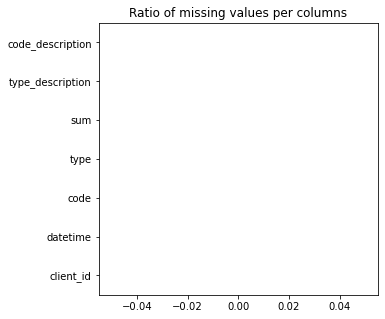

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
data.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")

With the help of the bar graph, we see that our data does not have NULL values.

## Explanatory data analysis and few of feature engineering

First of all it is a good practice to transfer datetime from a string to a real datetime object or to integers. I will try to use integers, since they are more suitable for feature engineering

In [12]:
from datetime import datetime

data['day'] = data['datetime'].str.split(' ').apply(lambda x: int(x[0]))
data['hour'] = data['datetime'].str.split(' ').apply(lambda x:  min(int(x[1].split(':')[0]), 23))
data.head()

,client_id,datetime,code,type,sum,type_description,code_description,day,hour
0,96372458,421 06:33:15,6011,2010,-561478.94,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,421,6
1,21717441,55 13:38:47,6011,2010,-44918.32,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,55,13
2,14331004,263 12:57:08,6011,2010,-3368873.66,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,263,12
3,2444292,355 09:47:45,6011,2010,-65131.56,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,355,9
4,2132533,184 20:09:07,6011,2010,-224591.58,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,184,20


###### As expected from the insights in the Descriptive statistics and analysis section, most transactions are money outflow. The overall distribution of transaction sums can be viewed using a boxplot

<AxesSubplot:>

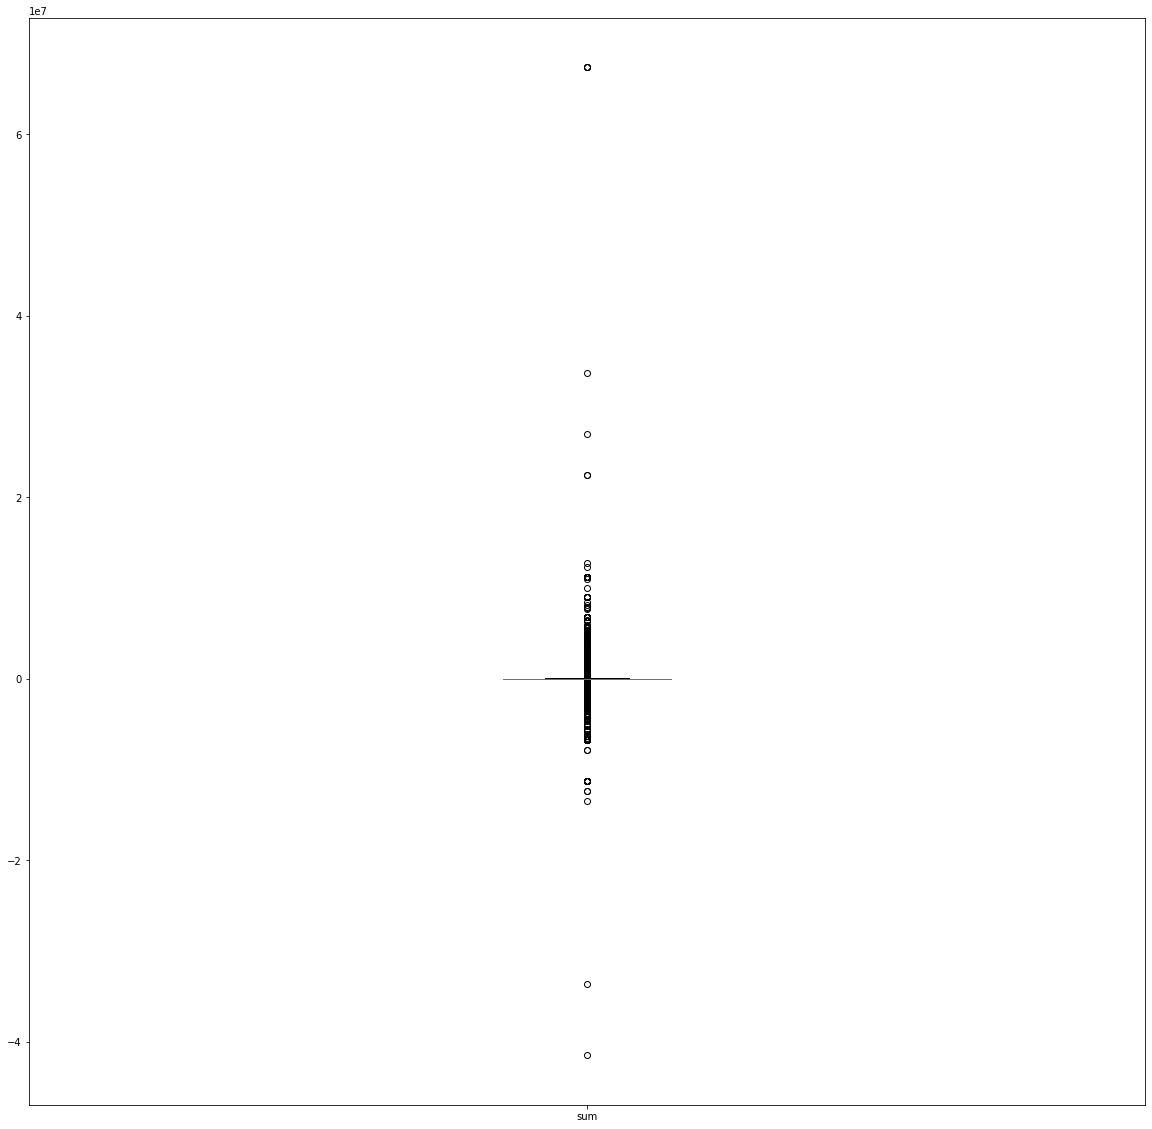

In [13]:
data['sum'].plot.box(figsize=(20,20))

###### This plot shows us that there are multiple outliers. We will get rid of them

In [14]:
data = data.loc[(np.abs(data['sum'] - data['sum'].median()) < 2 * data['sum'].std())]

<AxesSubplot:>

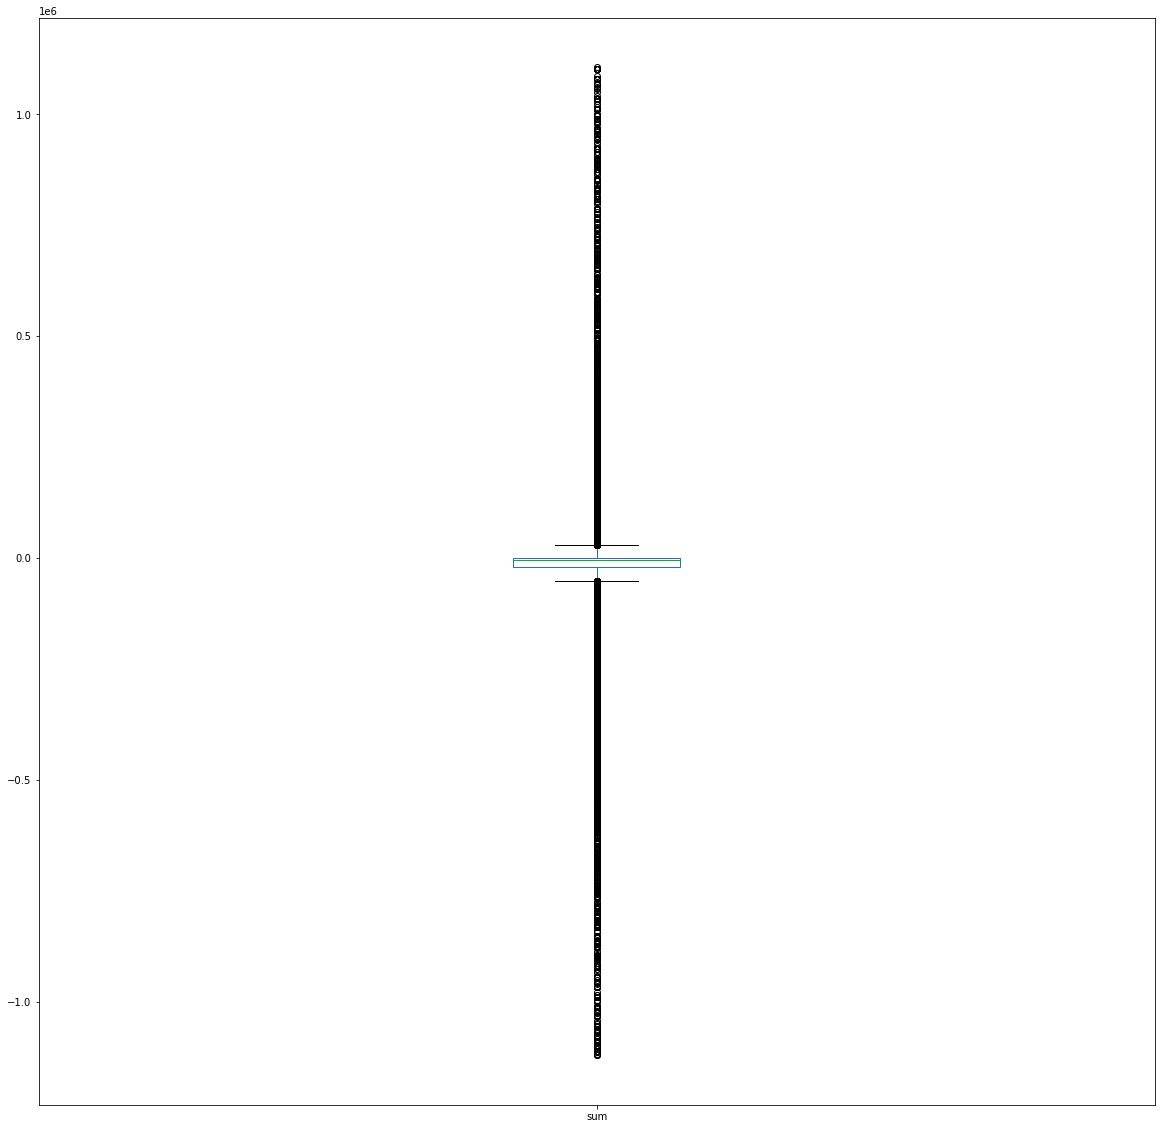

In [15]:
data['sum'].plot.box(figsize=(20,20))

Now the data looks a little bit better

Let us see the distribution of operations of different types

In [16]:
data.groupby(['type_description']).count()['client_id'].sort_values(ascending=False)

type_description
Покупка. POS                                                                                             48407
Выдача наличных в АТМ                                                                                    19820
Оплата услуги. Банкоматы                                                                                 18368
Перевод на карту (с карты) через Мобильный банк (без взимания комиссии с отправителя)                    12705
Списание с карты на карту по операции <перевода с карты на карту> через Мобильный банк (без комиссии)     6608
Взнос наличных через АТМ (в своем тер.банке)                                                              4716
Перевод на карту (с карты) через АТМ (в пределах одного тер.банка)                                        2777
Покупка.                                                                                                  2230
Покупка. Зарубеж.                                                                              

We can see disproportionality in the number of operations. Actually, the dominance of "purhcase via POS" can be easily explained: most stores have POS and people use it to purchase goods really often.

###### Let us see the cash amount of top-4 (have more than 10K operations) types of operations

In [17]:
total_sum = data.loc[(data['type_description'] == "Покупка. POS ") |
         (data['type_description'] == "Выдача наличных в АТМ") |
         (data['type_description'] == "Оплата услуги. Банкоматы") |
         (data['type_description'] == "Перевод на карту (с карты) через Мобильный банк (без взимания комиссии с отправителя)")]\
         .groupby(['type_description'])['sum'].sum().apply(abs).sum()
print("Total sum of these transactions is:", total_sum)


Total sum of these transactions is: 3607011374.330105


<AxesSubplot:ylabel='type_description'>

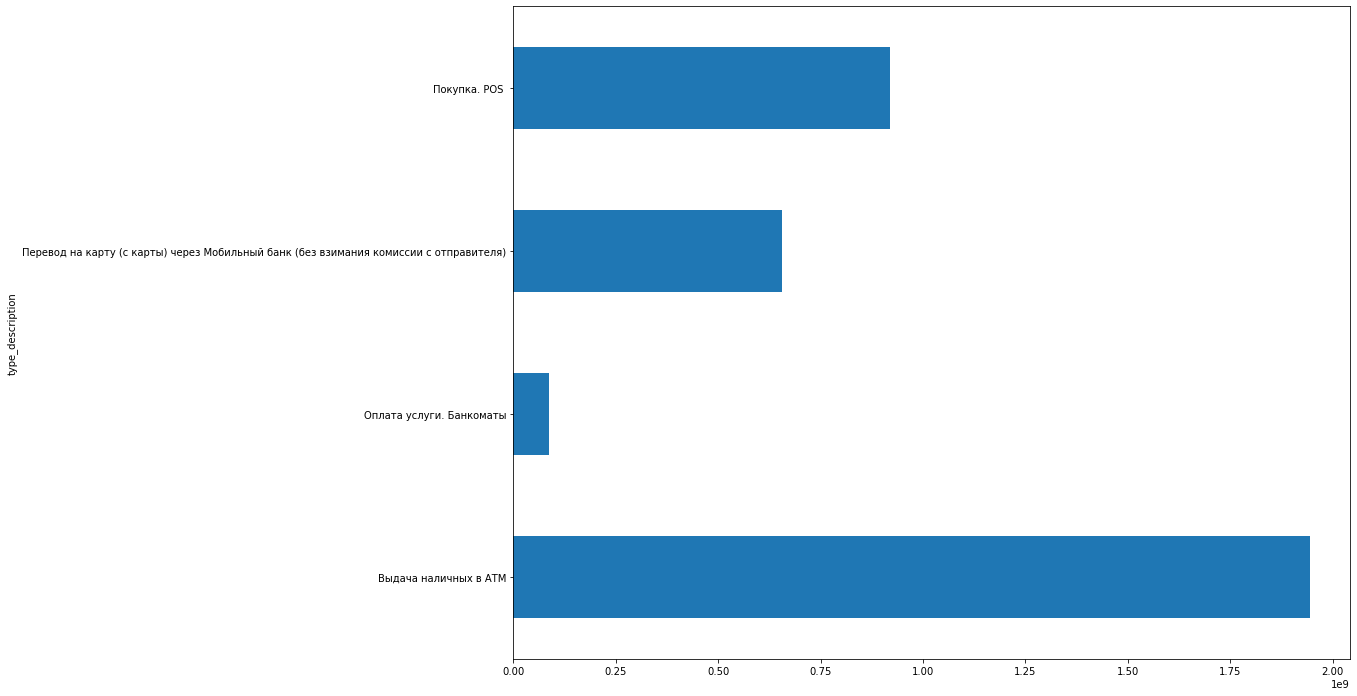

In [18]:
data.loc[(data['type_description'] == "Покупка. POS ") |
         (data['type_description'] == "Выдача наличных в АТМ") |
         (data['type_description'] == "Оплата услуги. Банкоматы") |
         (data['type_description'] == "Перевод на карту (с карты) через Мобильный банк (без взимания комиссии с отправителя)")]\
         .groupby(['type_description'])['sum'].sum().apply(abs).plot(kind='barh', figsize=(15,12))

We can see that despite the fact that there were more "purchases via POS" than all the other groups combined, the cash flow via this operation is just 25%, while "cash withdrawal via ATM" takes a half of all cash flows. It can be explained by the fact that when someone needs cash, the amount of cash is significant, while purchases can be relatively "small"

In [19]:
data['hour_sin'] = data['hour'].apply(lambda x: np.sin(x / 24 * 2 * np.pi))
data['hour_cos'] = data['hour'].apply(lambda x: np.cos(x / 24 * 2 * np.pi))
data

,client_id,datetime,code,type,sum,type_description,code_description,day,hour,hour_sin,hour_cos
0,96372458,421 06:33:15,6011,2010,-561478.94,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,421,6,1.000000,6.123234e-17
1,21717441,55 13:38:47,6011,2010,-44918.32,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,55,13,-0.258819,-9.659258e-01
3,2444292,355 09:47:45,6011,2010,-65131.56,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,355,9,0.707107,-7.071068e-01
4,2132533,184 20:09:07,6011,2010,-224591.58,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,184,20,-0.866025,5.000000e-01
5,20166346,404 16:32:48,6011,2010,-22459.16,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,404,16,-0.866025,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...
129993,51907756,136 00:00:00,4131,1200,-146433.71,Покупка. Зарубеж.,Автобусные линии,136,0,0.000000,1.000000e+00
129994,61978280,401 00:00:00,5169,1200,-271194.78,Покупка. Зарубеж.,"Химикалии и смежные вещества, не классифициров...",401,0,0.000000,1.000000e+00
129995,97803699,371 19:47:00,6513,1210,-60792.00,Покупка. POS Зарубеж.,Агенты и менеджеры по аренде недвижимости,371,19,-0.965926,2.588190e-01
129996,63953233,15 00:00:00,4411,1210,-77535.30,Покупка. POS Зарубеж.,Круизные линии,15,0,0.000000,1.000000e+00


In [20]:
dummy_codes = pd.get_dummies(data['code'])
dummy_types = pd.get_dummies(data['type'])

In [21]:
data = data.join(dummy_codes)
data

,client_id,datetime,code,type,sum,type_description,code_description,day,hour,hour_sin,...,8220,8299,8398,8641,8699,8999,9222,9311,9399,9402
0,96372458,421 06:33:15,6011,2010,-561478.94,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,421,6,1.000000,...,0,0,0,0,0,0,0,0,0,0
1,21717441,55 13:38:47,6011,2010,-44918.32,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,55,13,-0.258819,...,0,0,0,0,0,0,0,0,0,0
3,2444292,355 09:47:45,6011,2010,-65131.56,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,355,9,0.707107,...,0,0,0,0,0,0,0,0,0,0
4,2132533,184 20:09:07,6011,2010,-224591.58,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,184,20,-0.866025,...,0,0,0,0,0,0,0,0,0,0
5,20166346,404 16:32:48,6011,2010,-22459.16,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,404,16,-0.866025,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129993,51907756,136 00:00:00,4131,1200,-146433.71,Покупка. Зарубеж.,Автобусные линии,136,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
129994,61978280,401 00:00:00,5169,1200,-271194.78,Покупка. Зарубеж.,"Химикалии и смежные вещества, не классифициров...",401,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
129995,97803699,371 19:47:00,6513,1210,-60792.00,Покупка. POS Зарубеж.,Агенты и менеджеры по аренде недвижимости,371,19,-0.965926,...,0,0,0,0,0,0,0,0,0,0
129996,63953233,15 00:00:00,4411,1210,-77535.30,Покупка. POS Зарубеж.,Круизные линии,15,0,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data = data.join(dummy_types, lsuffix='_type')
data

,client_id,datetime,code,type,sum,type_description,code_description,day,hour,hour_sin,...,7034,7035,7040,7041,7070,7071,7074,7075,8100,8145
0,96372458,421 06:33:15,6011,2010,-561478.94,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,421,6,1.000000,...,0,0,0,0,0,0,0,0,0,0
1,21717441,55 13:38:47,6011,2010,-44918.32,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,55,13,-0.258819,...,0,0,0,0,0,0,0,0,0,0
3,2444292,355 09:47:45,6011,2010,-65131.56,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,355,9,0.707107,...,0,0,0,0,0,0,0,0,0,0
4,2132533,184 20:09:07,6011,2010,-224591.58,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,184,20,-0.866025,...,0,0,0,0,0,0,0,0,0,0
5,20166346,404 16:32:48,6011,2010,-22459.16,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,404,16,-0.866025,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129993,51907756,136 00:00:00,4131,1200,-146433.71,Покупка. Зарубеж.,Автобусные линии,136,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
129994,61978280,401 00:00:00,5169,1200,-271194.78,Покупка. Зарубеж.,"Химикалии и смежные вещества, не классифициров...",401,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
129995,97803699,371 19:47:00,6513,1210,-60792.00,Покупка. POS Зарубеж.,Агенты и менеджеры по аренде недвижимости,371,19,-0.965926,...,0,0,0,0,0,0,0,0,0,0
129996,63953233,15 00:00:00,4411,1210,-77535.30,Покупка. POS Зарубеж.,Круизные линии,15,0,0.000000,...,0,0,0,0,0,0,0,0,0,0


And the last, but not the least, we have to normalize sums, so that this feature has normal distribution

In [23]:
data['sum'] = (data['sum'] - data['sum'].mean())/data['sum'].std()

In [24]:
data.head()

,client_id,datetime,code,type,sum,type_description,code_description,day,hour,hour_sin,...,7034,7035,7040,7041,7070,7071,7074,7075,8100,8145
0,96372458,421 06:33:15,6011,2010,-4.223069,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,421,6,1.000000,...,0,0,0,0,0,0,0,0,0,0
1,21717441,55 13:38:47,6011,2010,-0.208051,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,55,13,-0.258819,...,0,0,0,0,0,0,0,0,0,0
3,2444292,355 09:47:45,6011,2010,-0.365160,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,355,9,0.707107,...,0,0,0,0,0,0,0,0,0,0
4,2132533,184 20:09:07,6011,2010,-1.604579,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,184,20,-0.866025,...,0,0,0,0,0,0,0,0,0,0
5,20166346,404 16:32:48,6011,2010,-0.033485,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,404,16,-0.866025,...,0,0,0,0,0,0,0,0,0,0


# Supervised learning

We will keep using our 'data' variable from the previous part, however, now we are going to merge it with train dataset. But we have to prepare data beforehand

In [25]:
data1 = data.drop(['type_description','code_description','day','hour',], axis=1)
data1 = data1.groupby(['client_id'], as_index=True)['hour_sin','hour_cos','sum'].mean()
data1.columns = [str(x) for x in data1.columns]
data1

<ipython-input-25-051be5f363dd>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data1 = data1.groupby(['client_id'], as_index=True)['hour_sin','hour_cos','sum'].mean()


,hour_sin,hour_cos,sum
client_id,,,
22899,-0.196236,-0.535477,0.184994
27914,-0.004410,-0.699469,0.285098
28753,0.145766,-0.110190,0.257540
31385,-0.099182,-0.242161,0.091142
38084,-0.431426,-0.128208,0.348399
...,...,...,...
99967537,0.707107,-0.707107,-2.477409
99984336,-0.531211,-0.799494,0.293827
99985917,0.258819,-0.965926,-1.604579


In [26]:
data2 = data.drop(['type_description','code_description','day','hour', 
                   'hour_sin','hour_cos','sum'], axis=1)
data2 = data2.groupby(['client_id'], as_index=True).sum()
data2.columns = [str(x) for x in data2.columns]
data2

,code,type,742,1711,1799,2741,3000,3351,3501,4111,...,7034,7035,7040,7041,7070,7071,7074,7075,8100,8145
client_id,,,,,,,,,,,,,,,,,,,,,
22899,51818,34391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27914,21649,16090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28753,62236,17470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31385,70143,27421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38084,141335,70520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99967537,6011,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99984336,24044,23040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99985917,6011,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
data_3 = data1.join(data2)
data_3

,hour_sin,hour_cos,sum,code,type,742,1711,1799,2741,3000,...,7034,7035,7040,7041,7070,7071,7074,7075,8100,8145
client_id,,,,,,,,,,,,,,,,,,,,,
22899,-0.196236,-0.535477,0.184994,51818,34391,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27914,-0.004410,-0.699469,0.285098,21649,16090,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28753,0.145766,-0.110190,0.257540,62236,17470,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31385,-0.099182,-0.242161,0.091142,70143,27421,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38084,-0.431426,-0.128208,0.348399,141335,70520,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99967537,0.707107,-0.707107,-2.477409,6011,2010,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99984336,-0.531211,-0.799494,0.293827,24044,23040,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99985917,0.258819,-0.965926,-1.604579,6011,2010,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
targets = pd.read_csv('train_set.csv', sep=';')
targets = targets.set_index('client_id')
targets

,target
client_id,
75063019,0
86227647,1
6506523,0
50615998,0
95213230,0
...,...
71577803,0
8128547,1
26055781,0


In [29]:
data_full = data_3.join(targets)
data_full

,hour_sin,hour_cos,sum,code,type,742,1711,1799,2741,3000,...,7035,7040,7041,7070,7071,7074,7075,8100,8145,target
client_id,,,,,,,,,,,,,,,,,,,,,
22899,-0.196236,-0.535477,0.184994,51818,34391,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
27914,-0.004410,-0.699469,0.285098,21649,16090,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28753,0.145766,-0.110190,0.257540,62236,17470,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31385,-0.099182,-0.242161,0.091142,70143,27421,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
38084,-0.431426,-0.128208,0.348399,141335,70520,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99967537,0.707107,-0.707107,-2.477409,6011,2010,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99984336,-0.531211,-0.799494,0.293827,24044,23040,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
99985917,0.258819,-0.965926,-1.604579,6011,2010,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here we have combined all our data, and how can we see what is there we have NULL values.

In [30]:
data_full = data_full.dropna()
data_full

,hour_sin,hour_cos,sum,code,type,742,1711,1799,2741,3000,...,7035,7040,7041,7070,7071,7074,7075,8100,8145,target
client_id,,,,,,,,,,,,,,,,,,,,,
22899,-0.196236,-0.535477,0.184994,51818,34391,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
27914,-0.004410,-0.699469,0.285098,21649,16090,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28753,0.145766,-0.110190,0.257540,62236,17470,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38084,-0.431426,-0.128208,0.348399,141335,70520,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49793,-0.417729,-0.352426,-0.370583,113841,36530,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99900908,0.227792,-0.418154,0.029075,28913,6050,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99911226,-0.298328,-0.544728,-0.291328,66335,16140,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99967537,0.707107,-0.707107,-2.477409,6011,2010,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
#for splitting data arrays into two subsets: for training data and for testing data.
from sklearn.model_selection import train_test_split
X = data_full.drop('target', axis=1)
y = data_full['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from joblib import load, dump

# import models
!pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


[Text(173.02839515010967, 213.69103448275862, 'hour_cos <= -0.247\ngini = 0.493\nsamples = 4017\nvalue = [2241, 1776]'),
 Text(47.10105628050853, 206.19310344827585, 'sum <= -0.289\ngini = 0.476\nsamples = 2265\nvalue = [1382, 883]'),
 Text(10.304933267424618, 198.6951724137931, 'sum <= -1.115\ngini = 0.499\nsamples = 415\nvalue = [200, 215]'),
 Text(4.567711319822046, 191.19724137931036, 'sum <= -3.438\ngini = 0.456\nsamples = 108\nvalue = [38, 70]'),
 Text(1.0591794364804745, 183.69931034482758, 'sum <= -4.485\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.7061196243203164, 176.20137931034483, 'hour_cos <= -0.933\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.3530598121601582, 168.70344827586206, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(1.0591794364804745, 168.70344827586206, 'hour_cos <= -0.787\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7061196243203164, 161.2055172413793, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(1.4122392486406328, 161.205

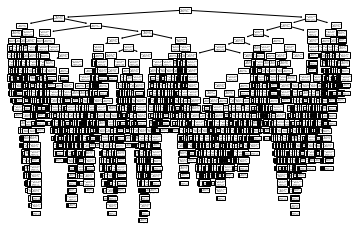

In [33]:
model = DecisionTreeClassifier()
model.fit(X_train[['hour_sin', 'hour_cos', 'sum']], y_train)
from sklearn.tree import plot_tree 
%matplotlib inline

plot_tree(model, feature_names = X.columns)

In [34]:
models = [('LR',    LogisticRegression()),
          ('KNN',   KNeighborsClassifier()),
          ('CART',  DecisionTreeClassifier()),
          ('RF',  RandomForestClassifier()),
          ('LGMB',  LGBMClassifier())]

pipelines = {}

for name, model in models:
    pipelines[name] = Pipeline([('scale', StandardScaler()),
                                ('model', model)])
    pipe = pipelines[name]
    pipe.fit(X_train, y_train)
    y_hat = pipe.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_hat)
    f = f1_score(y_test, y_hat)
    print(name, ': testing performance')
    print('Roc auc: {:.2f}'.format(roc_auc))
    print('F-score: {:.4f}\n'.format(f))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR : testing performance
Roc auc: 0.63
F-score: 0.5315

KNN : testing performance
Roc auc: 0.58
F-score: 0.4803

CART : testing performance
Roc auc: 0.55
F-score: 0.4893

RF : testing performance
Roc auc: 0.64
F-score: 0.5581

LGMB : testing performance
Roc auc: 0.64
F-score: 0.5587



We see that both modes: Logistic regression and LGMBoost have shown pretty close results. Since LGMBoost is out of our classes scope, we will continut with LogisticRegression

We will do grid search with crossvalidation (on 3 folds) to identify

best parameters of Ligistic Regression for our task

In [ ]:
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2","elasticnet"], 
      "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=3)
logreg_cv.fit(X_train,y_train)

print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

In [ ]:
logregBest = LogisticRegression(C=0.1,penalty="l2", solver='newton-cg')
logregBest.fit(X_train,y_train)

y_hat = logregBest.predict(X_test)
roc_auc = roc_auc_score(y_test, y_hat)
f = f1_score(y_test, y_hat)
print("Logreg after CV", ': testing performance')
print('Roc auc: {:.2f}'.format(roc_auc))
print('F-score: {:.4f}\n'.format(f))
print("score",logregBest.score(X_test,y_test))

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = logregBest.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


lr_probs = logregBest.predict_proba(X_test)
yhat = logregBest.predict(X_test)

lr_precision, lr_recall, _ = precision_recall_curve(y_test.tolist(), lr_probs[:, 1])
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

# Analysis and conclusion


We have compared several models, as a result, boosting algorithms (LGMBoost) have shown the best roc-auc score. However, we have tested logistic regression, applied Crossvalidation and grid search to this model and and improved roc-auc score from 0.64 to roughtly (with the best threshold) 0.7. F-score did not change much.

Since we have no imbalance in data (0s and 1s are in the roughtly same proportions), evaluating the model using Roc-Auc curve is more reasonable.

To conclude, our model is good at recognizing gender using transactions history.